In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

## The project refers to the link below:
- https://nsamrao.github.io/Boston_Housing/

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
boston = load_boston()

In [6]:
type(boston)

sklearn.datasets.base.Bunch

In [8]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [10]:
boston['data']

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [11]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [14]:
    print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [18]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [21]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [29]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


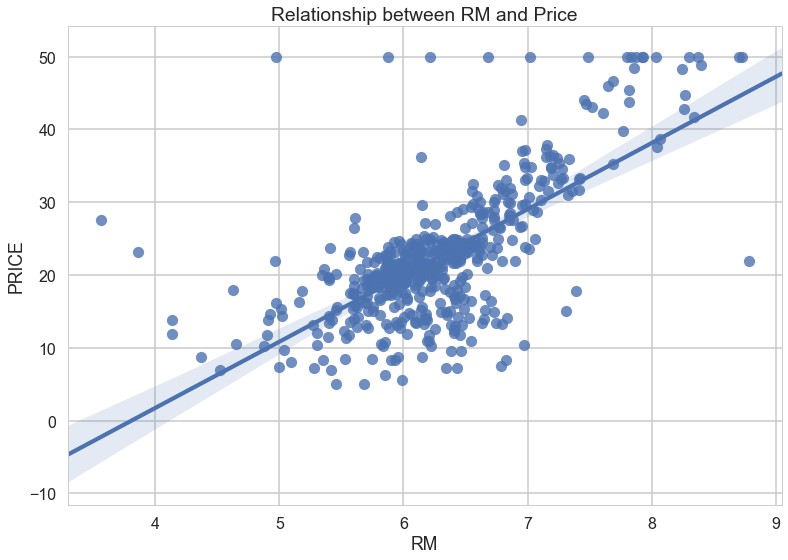

In [30]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and Price")

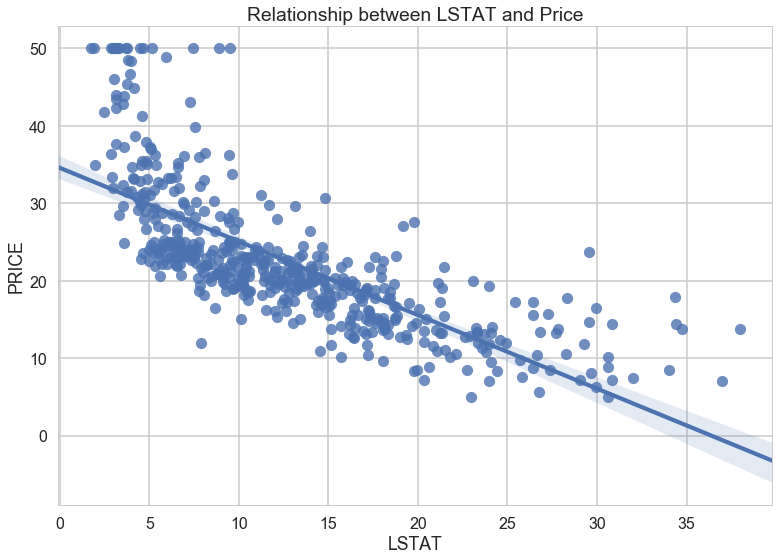

In [31]:
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

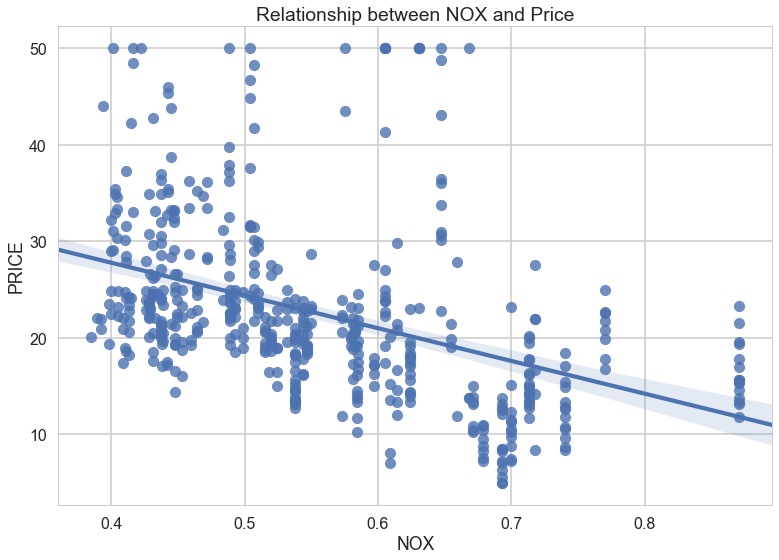

In [32]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between NOX and Price")

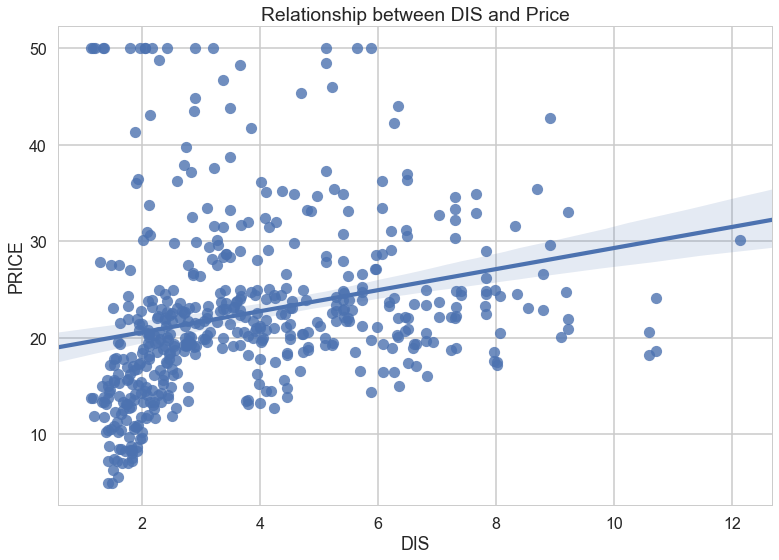

In [33]:
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)
plt.title("Relationship between DIS and Price")

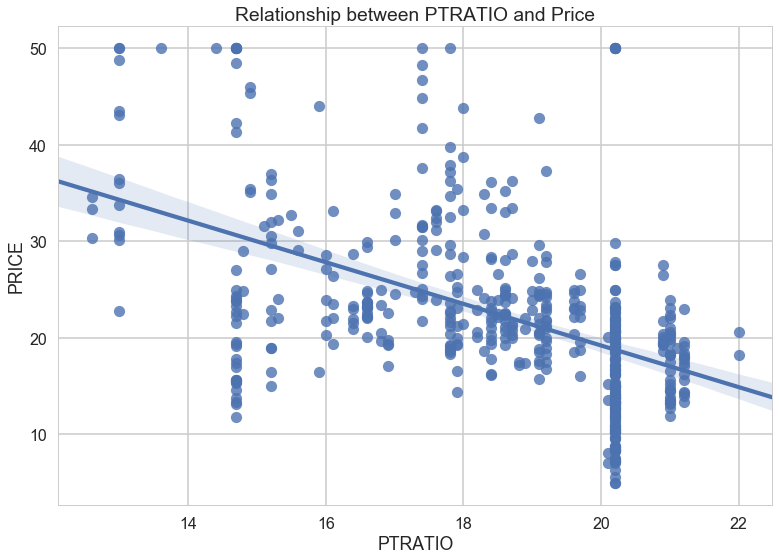

In [34]:
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

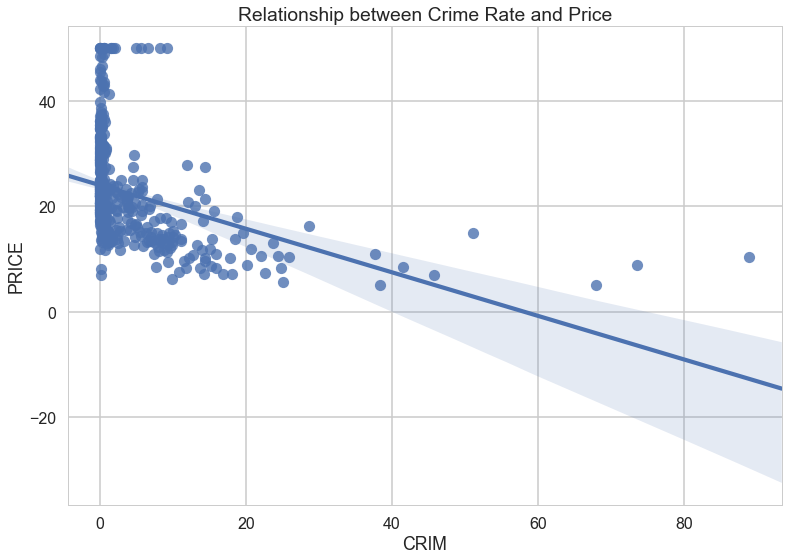

In [35]:
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

In [37]:
bos.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'price', u'PRICE'],
      dtype='object')

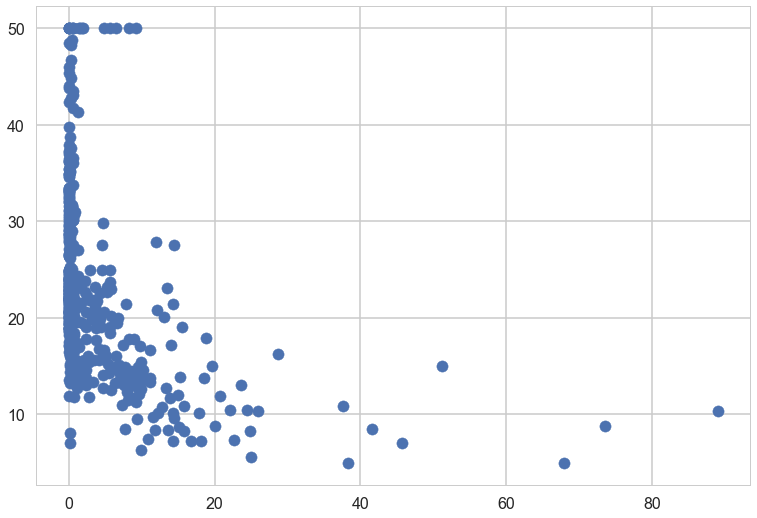

In [39]:
plt.scatter(bos.CRIM,bos.PRICE)

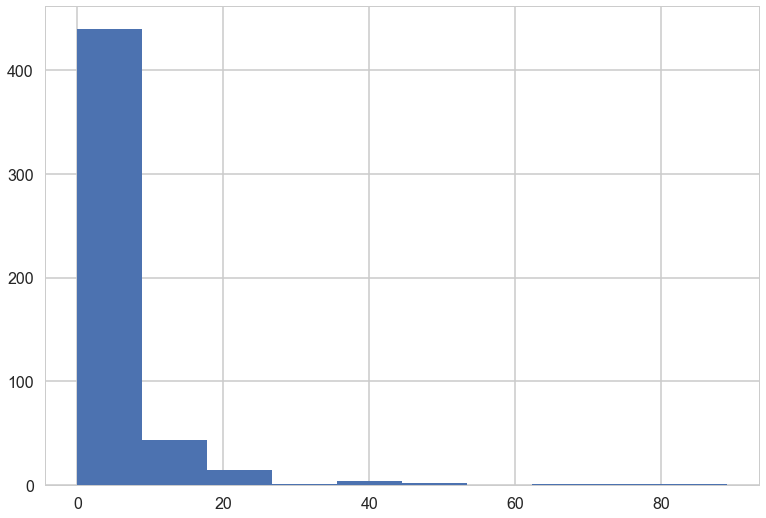

In [42]:
bos.CRIM.hist()

(array([  12.,   45.,  109.,   94.,   59.,   38.,   44.,   65.,   32.,    8.]),
 array([-5.06403607, -4.10879557, -3.15355507, -2.19831457, -1.24307408,
        -0.28783358,  0.66740692,  1.62264742,  2.57788792,  3.53312842,
         4.48836892]),
 <a list of 10 Patch objects>)

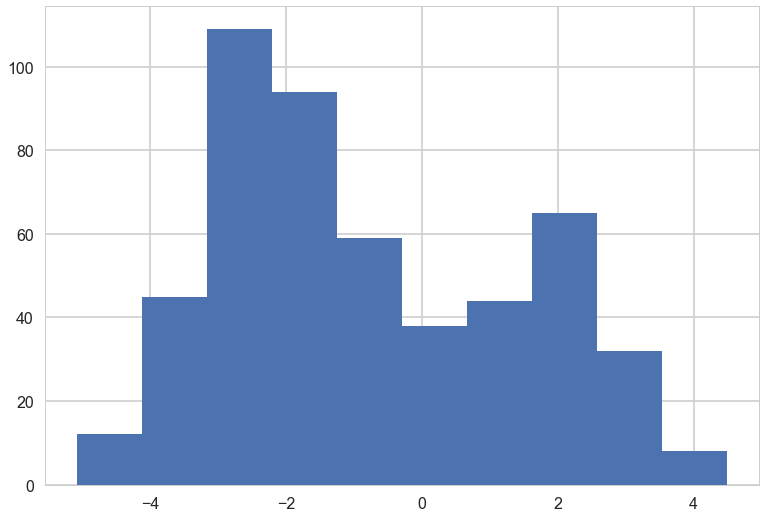

In [45]:
plt.hist(np.log(bos.CRIM))

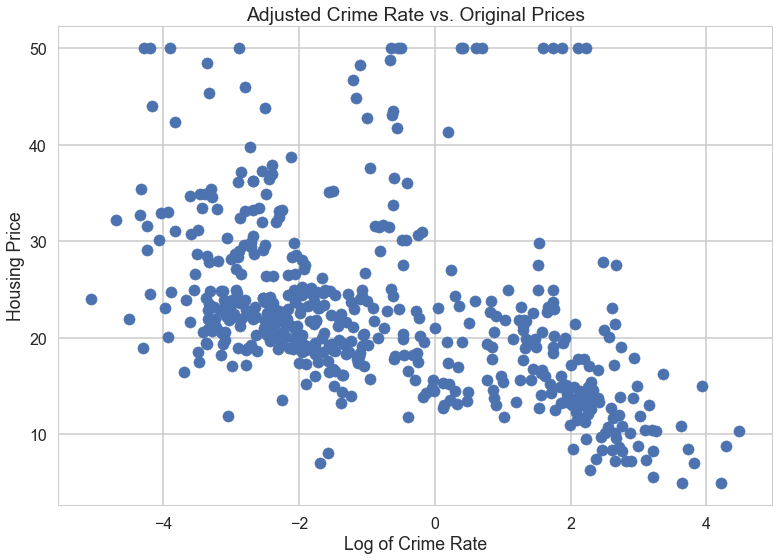

In [48]:
x=np.log(bos.CRIM)
plt.scatter(x,bos.PRICE)

plt.xlabel("Log of Crime Rate")
plt.ylabel("Housing Price")
plt.title("Adjusted Crime Rate vs. Original Prices")

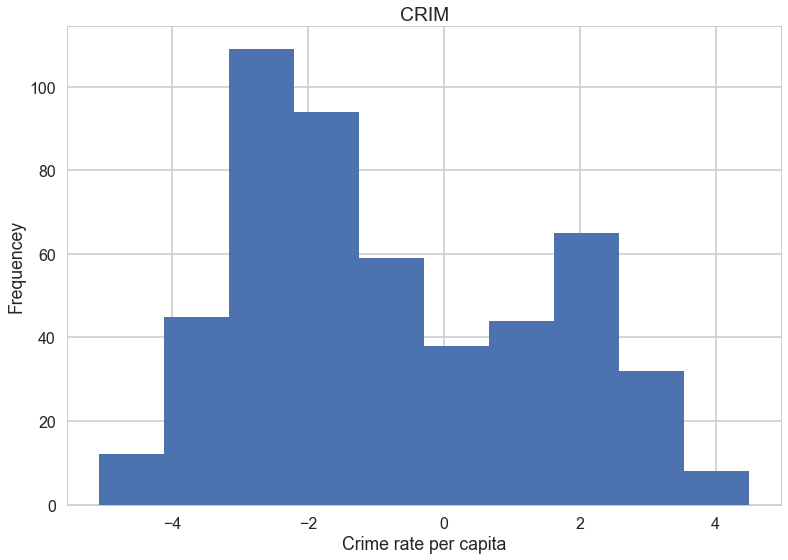

In [49]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

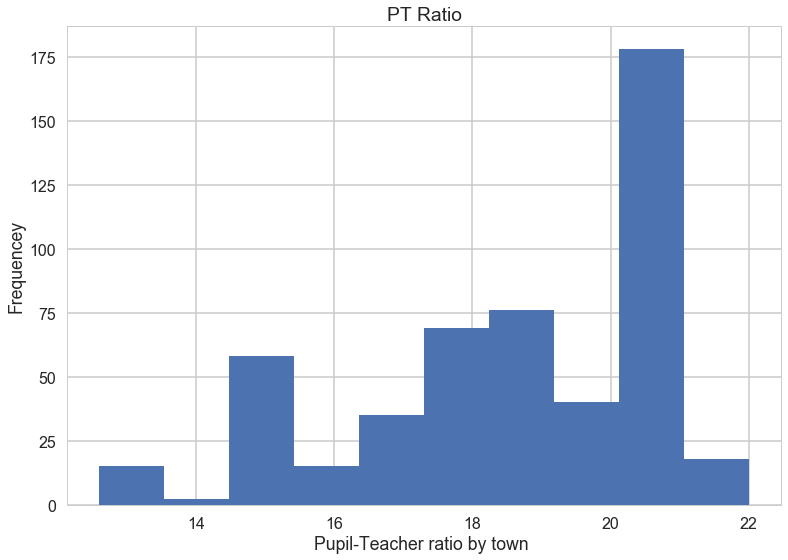

In [50]:
plt.hist(bos.PTRATIO)
plt.title("PT Ratio")
plt.xlabel("Pupil-Teacher ratio by town ")
plt.ylabel("Frequencey")
plt.show()

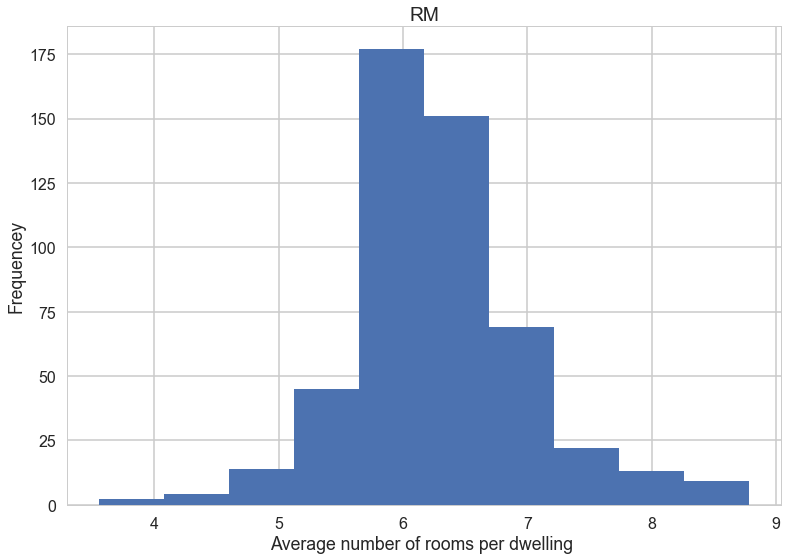

In [51]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling ")
plt.ylabel("Frequencey")
plt.show()

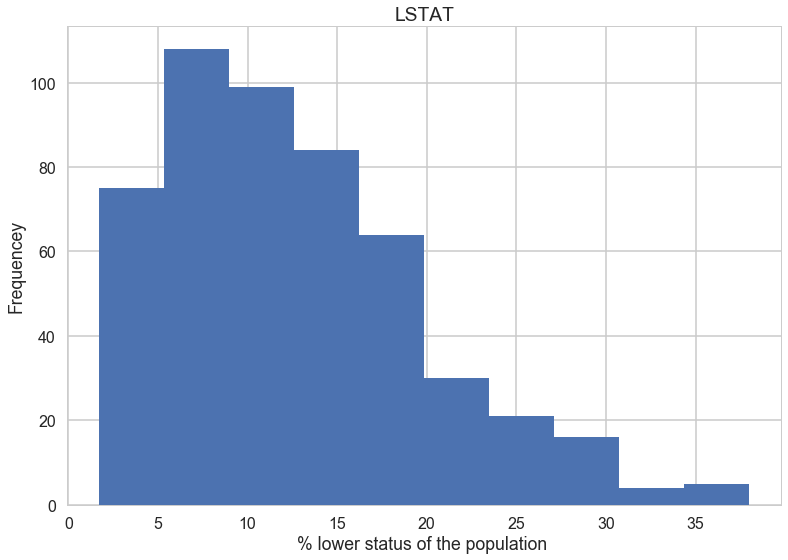

In [52]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population ")
plt.ylabel("Frequencey")
plt.show()

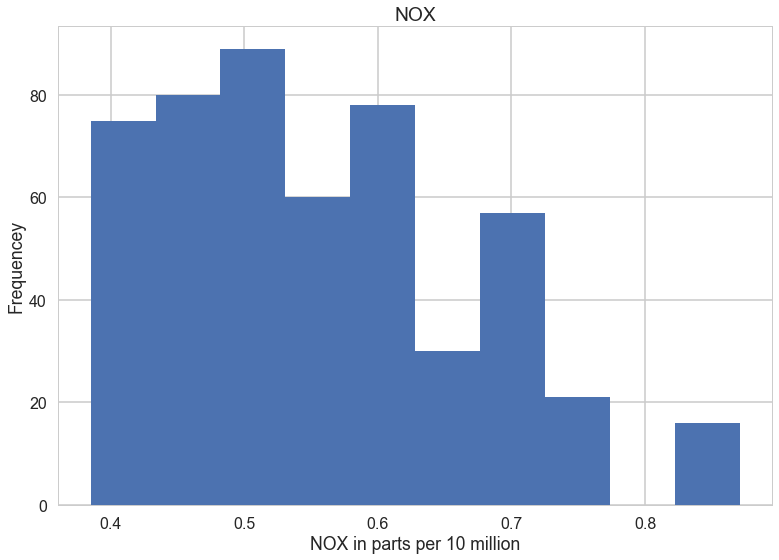

In [53]:
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("NOX in parts per 10 million")
plt.ylabel("Frequencey")
plt.show()

In [54]:
bos1=bos
bos1['CRIM']=np.log(bos.CRIM)